This notebook will be used to import the results from the ZooScatR model simulations.

## Import important stuff

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import array as arr
from scipy.stats import kde
%matplotlib inline

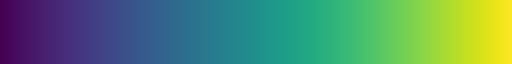

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)

# Read data
Read in the data from the simulations run in R with ZooScatR. A script including the simulations can be found in sim_Muriel.Rmd.

In [3]:
simulations = pd.read_feather('../ZooScatStuff/my_simplified_data.feather')
# Add a row for sigma_bs
simulations['sigbs'] = 10**(simulations.TS/10)

### Plot cross sectional backscatter data

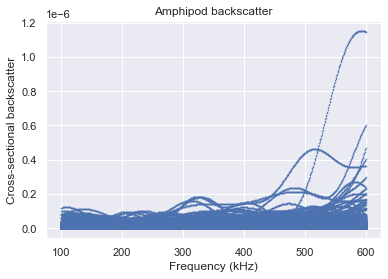

In [4]:
plt.plot(simulations.freq[simulations['spec']=='Amphipod'],simulations.sigbs[simulations['spec']=='Amphipod'],'.', markersize=1)                                                                                                                              
plt.title('Amphipod backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)');

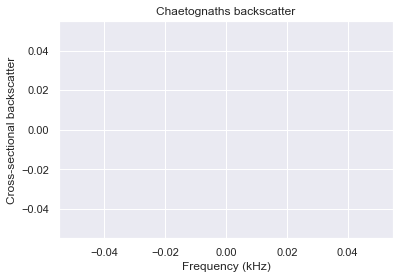

In [6]:
plt.plot(simulations.freq[simulations['spec']=='Chaetognaths'],simulations.sigbs[simulations['spec']=='Chaetognaths'],'.', markersize=1)                                                                                                                              
plt.title('Chaetognaths backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)');

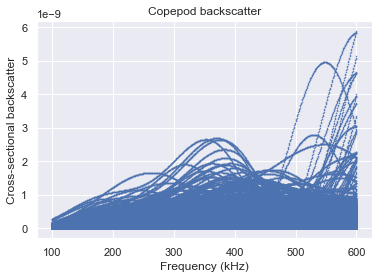

In [7]:
plt.plot(simulations.freq[simulations['spec']=='Copepod'],simulations.sigbs[simulations['spec']=='Copepod'],'.', markersize=1)                                                                                                                              
plt.title('Copepod backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)');

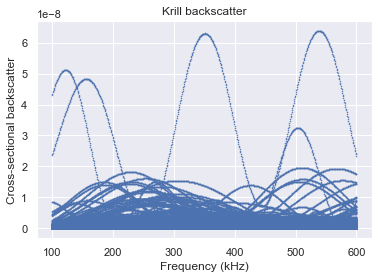

In [8]:
plt.plot(simulations.freq[simulations['spec']=='Krill'],simulations.sigbs[simulations['spec']=='Krill'],'.', markersize=1)                                                                                                                              
plt.title('Krill backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)');

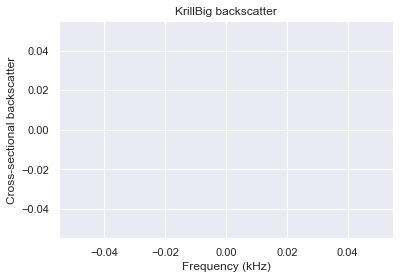

In [9]:
plt.plot(simulations.freq[simulations['spec']=='KrillBig'],simulations.sigbs[simulations['spec']=='KrillBig'],'.', markersize=1)   
plt.title('KrillBig backscatter')
plt.ylabel('Cross-sectional backscatter')
plt.xlabel('Frequency (kHz)');

# Organize $\sigma_{bs}$ 
Calculate the mean $\sigma_{bs}$  at each frequency interval for each species

In [10]:
simulations_min = simulations.groupby(["spec","freq"]).agg({'sigbs':'min'})
simulations_max = simulations.groupby(["spec","freq"]).agg({'sigbs':'max'})
simulations_mean = simulations.groupby(["spec","freq"]).agg({'sigbs':'mean'})

In the linear form ($\sigma_{bs}$) the dispersion of data are not at all following a normal distribution around the mean. In this case we can use he standard deviation and dispersion internals to summarize the spread of the data. We will call it the disersion range (Greenacre 2016). I am using the 95% confidence interval. (z-score*std = 1.95*std for 95%). I am using this metric to describe the spread of the data, not the confidence in the mean.

* consider using a squewed calculation for confidence interval for this data
Doing it. Will use scipy.stats.tstd to apply a lower or upper limit (the mean) to trim te sample standard deviation

*Calculating the standard below and above the mean for different dispertion interval*

In [11]:
mean_bs = simulations_mean.reset_index('freq')
min_bs = simulations_min.reset_index('freq')
max_bs = simulations_max.reset_index('freq')


In the linear form ($\sigma_{bs}$) the dispersion of data are not at all following a normal distribution around the mean. In this case we can use he standard deviation and dispersion internals to summarize the spread of the data. We will call it the disersion range (Greenacre 2016). I am using the 95% confidence interval. (z-score*std = 1.95*std for 95%). I am using this metric to describe the spread of the data, not the confidence in the mean.

* consider using a squewed calculation for confidence interval for this data
Doing it. Will use scipy.stats.tstd to apply a lower or upper limit (the mean) to trim te sample standard deviation

## Plot 
I will plot the backscattering cross-section of each functional group.

<Figure size 720x720 with 0 Axes>

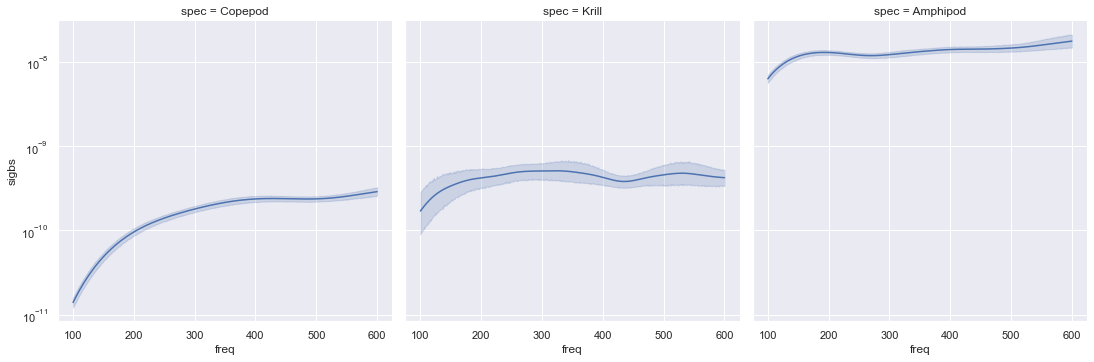

In [15]:
fig=plt.figure(figsize=(10, 10),facecolor='w', edgecolor='k')
g = sns.relplot(data=simulations, x="freq", y="sigbs",col="spec", kind="line", col_wrap=3);    
g.axes[0].set_yscale('log')
plt.ylabel("log(sigbs)");

Problem might be a lack of variability over the range I am observing

In [ ]:
g = sns.relplot(data=simulations, x="freq", y="sigbs", hue="spec", kind="line");  
plt.xlim(133,383)
g.ax.set_yscale('log')
plt.ylabel("log(sigbs)");

# Organize TS
Calculate the mean $TS$  at each frequency interval for each species

In the log form (TS) the dispersion of data are approximately normal around the mean. In this case we can use he standard deviation and confidence internals to summarize the spread of the data. I am using the 95% confidence interval. (z-score*std = 1.95*std for 95%)

(183.0, 383.0)

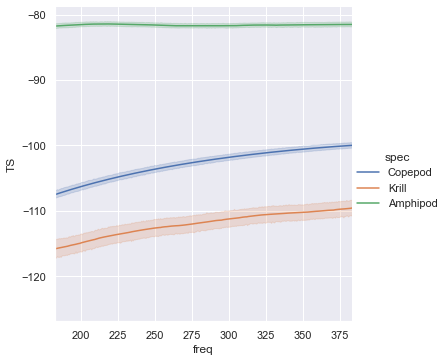

In [14]:
sns.relplot(data=simulations, x="freq", y="TS", hue="spec", kind="line");  
plt.xlim(183,383)


## Make matrix

In [ ]:
amph_sim = simulations[simulations['spec']=='Amphipod']
y = amph_sim.TS
x = amph_sim.freq

In [ ]:
nbins=20

fig, ax = plt.subplots(figsize=(10,10))
hexb = ax.hexbin(x, y, gridsize=nbins, cmap=sns.cm.flare_r)
cbar = fig.colorbar(hexb)

In [ ]:
fig, axes = plt.subplots(figsize=(5,5))
axes.set_title('2D Histogram')
axes.hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r);

In [ ]:
data_amph = pd.DataFrame({'TS':y,'freq':x}) 
k = kde.gaussian_kde(data_amph.T, 5)

xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
c = ax.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=sns.cm.flare_r)
cbar = fig.colorbar(c)


In [ ]:
sns.kdeplot(data=data_amph, x="freq", y="TS");

In [ ]:
sns.kdeplot(data=data_krill, x="freq", y="sigbs")

In [ ]:
len(amph_sim.TS)/len(amph_sim.freq.unique())
    